***Fundamentals of Artificial Intelligence***

> **Lab 4:** *Learning* <br>

> **Performed by:** *Corneliu Catlabuga*, group *FAF-213* <br>

> **Verified by:** Elena Graur, asist. univ.

### Task 1

Import the provided data. Make a detailed dataset analysis and present some statistics in the form of Matplotlib or Seaborn visualisations. Pre-process the data if necessary.

#### Basic dataset analysis

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

DATA_PATH = 'data/data.csv'
df = pd.read_csv(DATA_PATH, low_memory=False)

columns = ['BasePay', 'OvertimePay', 'OtherPay', 'Benefits', 'TotalPay', 'TotalPayBenefits']
df[columns] = df[columns].apply(pd.to_numeric, errors='coerce')

In [34]:
display(df.head())

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


#### Analysis of the numerical features

In [35]:
display(df[columns].describe().apply(lambda s: s.apply(lambda x: format(x, '.2f'))))

,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits
count,148045.00,148650.00,148650.00,112491.00,148654.00,148654.00
mean,66325.45,5066.06,3648.77,25007.89,74768.32,93692.55
std,42764.64,11454.38,8056.60,15402.22,50517.01,62793.53
min,-166.01,-0.01,-7058.59,-33.89,-618.13,-618.13
25%,33588.20,0.00,0.00,11535.40,36169.00,44065.65
50%,65007.45,0.00,811.27,28628.62,71426.61,92404.09
75%,94691.05,4658.18,4236.07,35566.85,105839.13,132876.45
max,319275.01,245131.88,400184.25,96570.66,567595.43,567595.43


Due to the fact that the the base pay contains negative values, those values will be removed from the dataset in order to enusre minimal error in the analysis.

#### Analysis of the categorical features

In [36]:
# Display the number of entries for non-numerical columns
entries = len(df)
num_job_titles = df['JobTitle'].nunique()
num_agencies = df['Agency'].nunique()
num_statuses = df['Status'].nunique()

display(pd.DataFrame({
    'Column': ['Entries', 'Job Titles', 'Agencies', 'Statuses'],
    'Count': [entries, num_job_titles, num_agencies, num_statuses]
}))

,Column,Count
0,Entries,148654
1,Job Titles,2159
2,Agencies,1
3,Statuses,2


In [37]:
# Get unique values for the 'Agency' column and 'Status' column
agencies = df['Agency'].unique()
statuses = df['Status'].unique()

print('Agencies:', agencies)
print('Statuses:', statuses)

Agencies: ['San Francisco']
Statuses: [nan 'PT' 'FT']


Due to the fact that the `Agency` column having only one unique value, it would not have an impact on the model. 

The `Status` column has 3 unique values which can be encoded as integers from 0 to 2: 
- `0` - missing value (`nan`)
- `1` - Full-Time (`FT`)
- `2` - Part-Time (`PT`)

#### Data pre-processing

The data pre-processing steps are the following:
- Set the `EmployeeName` to uppercase
- Remove the rows with missing `EmployeeName` values
- Set the `JobTitle` to uppercase
- Numerize the `Status` column
- Remove rows with negative values in any of the `...Pay` columns

In [ ]:
def clean_data(data: pd.DataFrame) -> pd.DataFrame:
    """Clean the data by removing rows with missing values and negative values in the 'BasePay' column.

    :param data: A pandas DataFrame containing the data to clean.
    :return: A pandas DataFrame with the data cleaned.
    """
    # Set the 'EmployeeName' column to uppercase
    data['EmployeeName'] = data['EmployeeName'].str.upper()

    # Remove rows with missing values
    data = data[data["EmployeeName"] != "Not provided"]

    # Set the 'JobTitle' column to uppercase
    data['JobTitle'] = data['JobTitle'].str.upper()

    # Numerize the 'Status' column
    data['Status'] = data['Status'].map({'FT': 1, 'PT': 2}).fillna(0)

    # Remove rows with negative values in the 'BasePay' column
    data = data[data["BasePay"] >= 0]
    data = data[data["OvertimePay"] >= 0]
    data = data[data["OtherPay"] >= 0]
    data = data[data["Benefits"] >= 0]
    data = data[data["TotalPay"] >= 0]

    return data

clean_df = clean_data(df)
clean_df.to_csv('data/cleaned_data.csv', index=False)

In [39]:
display(clean_df.head())

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
36159,36160,GARY ALTENBERG,"LIEUTENANT, FIRE SUPPRESSION",128808.87,220909.48,13126.31,44430.12,362844.66,407274.78,2012,NaN,San Francisco,0.0
36160,36161,GREGORY SUHR,CHIEF OF POLICE,302578.00,0.00,18974.11,69810.19,321552.11,391362.30,2012,NaN,San Francisco,0.0
36161,36162,KHOA TRINH,ELECTRONIC MAINTENANCE TECH,111921.00,146415.32,78057.41,53102.29,336393.73,389496.02,2012,NaN,San Francisco,0.0
36162,36163,JOANNE HAYES-WHITE,"CHIEF, FIRE DEPARTMENT",296943.01,0.00,17816.59,72047.88,314759.60,386807.48,2012,NaN,San Francisco,0.0
36163,36164,FREDERICK BINKLEY,EMT/PARAMEDIC/FIREFIGHTER,126863.19,192424.49,17917.18,44438.25,337204.86,381643.11,2012,NaN,San Francisco,0.0


In [40]:
columns = ['BasePay', 'OvertimePay', 'OtherPay', 'Benefits', 'TotalPay', 'TotalPayBenefits']
clean_df[columns] = clean_df[columns].apply(pd.to_numeric, errors='coerce')

display(clean_df[columns].describe().apply(lambda s: s.apply(lambda x: format(x, '.2f'))))

,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits
count,111868.00,111868.00,111868.00,111868.00,111868.00,111868.00
mean,67215.61,5267.14,3655.45,25117.34,76138.20,101255.54
std,43414.62,11765.31,8039.13,15371.43,51266.88,65244.39
min,0.00,0.00,0.00,0.00,0.00,0.00
25%,33665.61,0.00,0.00,12158.64,37064.68,49698.13
50%,65548.64,0.00,821.10,28699.57,72635.20,101977.38
75%,95229.03,4867.80,4308.62,35609.47,107541.07,143001.72
max,319275.01,220909.48,342802.63,96570.66,471952.64,510732.68


#### Data visualization

- The correlation matrix is visualized using a heatmap.
- The `JobTitle` column is converted to a numerical representation using the `LabelEncoder`.
- The correlation matrix is computed using the Pearson correlation coefficient.
- All the NaN value colums/rows are removed from the heatmap.

<Axes: title={'center': 'Heatmap of Correlation Matrix'}>

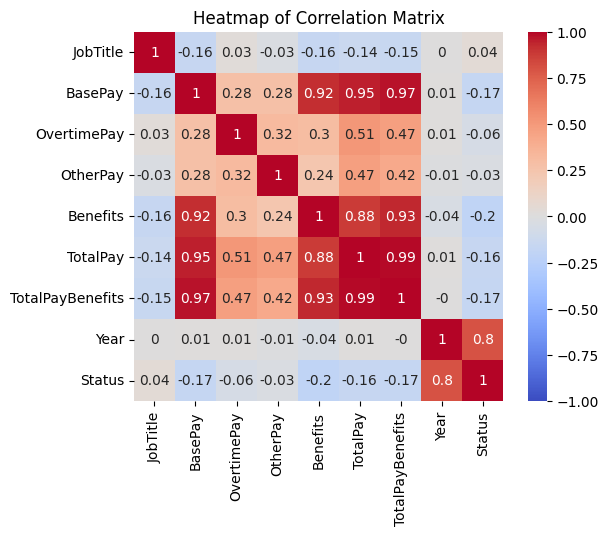

In [41]:
def get_correlation_matrix(data: pd.DataFrame) -> pd.DataFrame:
    """Get the level of correlation between the columns of the data.

    :param data: The data to analyze.
    :return: A list of lists, where each list represents the correlation between the columns of the data.
    """
    from sklearn.preprocessing import LabelEncoder

    le = LabelEncoder()
    le.fit(data["JobTitle"])
    data["JobTitle"] = le.transform(data["JobTitle"])

    data = data.apply(pd.to_numeric, errors="coerce")
    correlation_matrix = data.corr()
    correlation_matrix = correlation_matrix.dropna(axis=0, how="all")
    correlation_matrix = correlation_matrix.dropna(axis=1, how="all")
    correlation_matrix = correlation_matrix.round(2)
    correlation_matrix = correlation_matrix.iloc[1:, 1:]

    return correlation_matrix


plt.clf()
plt.title('Heatmap of Correlation Matrix')
sns.heatmap(get_correlation_matrix(clean_df), annot=True, cmap='coolwarm', center=0, vmin=-1, vmax=1, square=True)

Due to the fact that the `TotalPay` and `TotalPayBenefits` columns represent the totals of the previous columns, they will not be taken into account in the analysis. The highest correlation is between the `BasePay` and `Benefits` columns.

#### Visualizations between the BasePay and Benefits columns

<Axes: title={'center': 'Benefits and BasePay'}, xlabel='BasePay', ylabel='Benefits'>

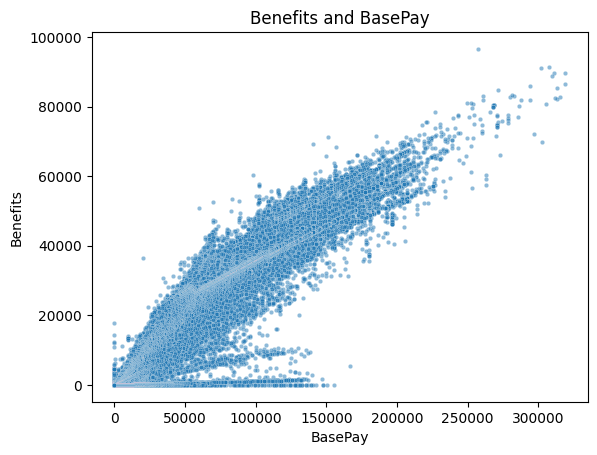

In [42]:
plt.clf()
plt.title('Benefits and BasePay')
sns.scatterplot(data=clean_df, x="BasePay", y="Benefits", alpha=0.5, s=10)

The graph shows a (somewhat) linear relationship between the `BasePay` and `Benefits` columns.

#### Visualizations between the BasePay and OtherPay columns

<Axes: title={'center': 'OtherPay and BasePay'}, xlabel='BasePay', ylabel='OtherPay'>

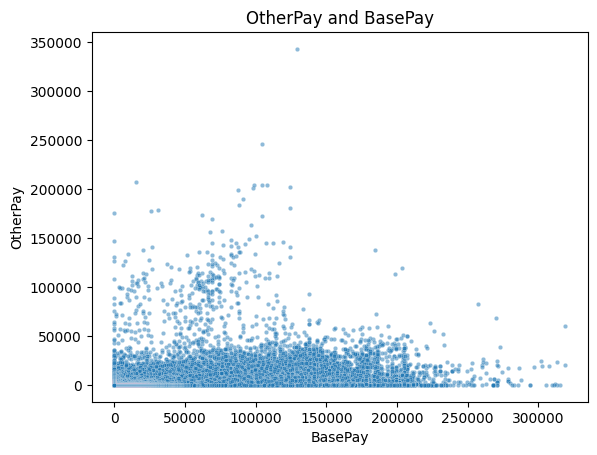

In [43]:
plt.clf()
plt.title('OtherPay and BasePay')
sns.scatterplot(data=clean_df, x="BasePay", y="OtherPay", alpha=0.5, s=10)

The graph does not show any obvious relationship between the `BasePay` and `OtherPay` columns.

#### Visualizations between the BasePay and OvertimePay columns

<Axes: title={'center': 'OvertimePay and BasePay'}, xlabel='BasePay', ylabel='OvertimePay'>

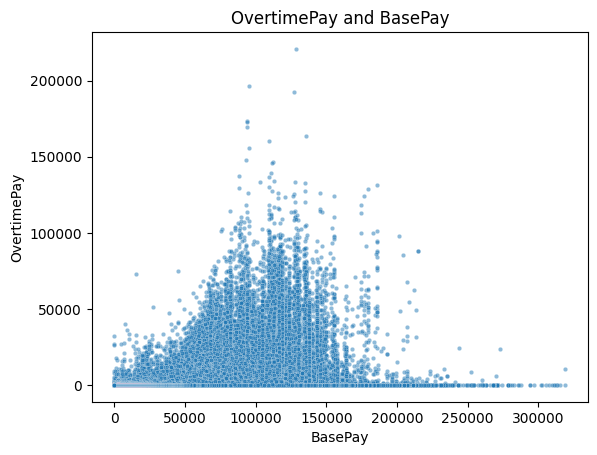

In [44]:
plt.clf()
plt.title('OvertimePay and BasePay')
sns.scatterplot(data=clean_df, x="BasePay", y="OvertimePay", alpha=0.5, s=10)

The graph shows a (somewhat) normal distribution between the `BasePay` and `OvertimePay` columns.

### Task 2

Based on the analysis from task 1, perform Feature Selection. You should state which columns you will be using for the final predictions and show why you are choosing the respective columns. Perform Linear Regression on your train set, using the selected features.

The columns that will be used for the final predictions are the following:
- `BasePay`
- `Benefits`

#### Linear Regression

R^2: 0.8427286314065663
Intercept: 3270.31011563462
Coefficient: [0.32502914]


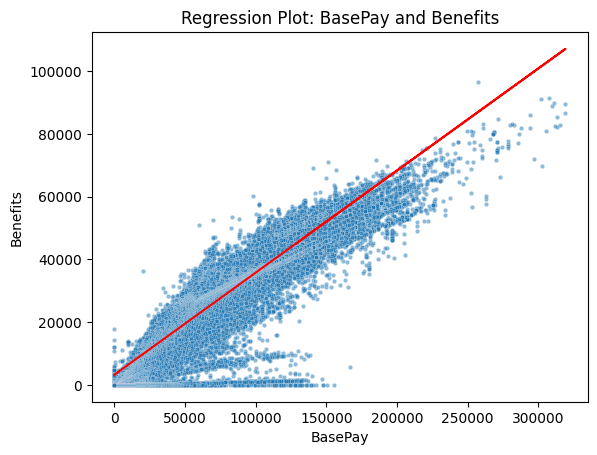

In [45]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
base_pay = clean_df["BasePay"].values.reshape(-1, 1)
benefits_pay = clean_df["Benefits"]
model.fit(base_pay, benefits_pay)
r_squared = model.score(base_pay, benefits_pay)
print(f"R^2: {r_squared}")
print(f"Intercept: {model.intercept_}")
print(f"Coefficient: {model.coef_}")

y_pred = model.predict(base_pay)
plt.clf()
plt.title("Regression Plot: BasePay and Benefits")
sns.scatterplot(data=clean_df, x="BasePay", y="Benefits", alpha=0.5, s=10)
plt.plot(base_pay, y_pred, color='red')

The $R^2$ score is the proportion of the variation in the dependent variable that is predictable from the independent variable(s). 

$$
R^2 = 1 - {{SS_{res}} \over {SS_{tot}}}
$$

Where:
- $SS_{res}$ is the sum of the squared residuals
- $SS_{tot}$ is the total sum of squares

$$
SS_{res} = \sum_{i=1}^{n} (y_i - f_i)^2
$$

$$
SS_{tot} = \sum_{i=1}^{n} (y_i - \bar{y})^2
$$

Where:
- $y_i$ is the actual value
- $f_i$ is the predicted value
- $\bar{y}$ is the mean of the actual values


The **intercept** is the value of the dependent variable when all the independent variables are equal to 0. The coefficient is the change in the dependent variable for a one-unit change in the independent variable.

The **coefficient** is the slope of the line. It represents the change in the dependent variable for a one-unit change in the independent variable.

### Task 3

Train at least two new Linear Regression models. You can use one of the following: Ridge, Lasso, Elastic Net Regularization, Ordinary Least Squares, Least-angle Regression (LAR).

### Task 4

Show the performance of your models. You can use one or multiple metrics that you consider more suitable for your case (e.g. MAE, MSE, RMSE, etc.) and explain why you decided to use them. Make conclusions on the obtained results and the performance of each of the developed models.

**MSE** (Mean Squared Error) is the average of the squared differences between the predicted and actual values. It is used to evaluate the performance of a regression model. The smaller the MSE, the better the model.

#### Lasso Regression

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

base_pay = clean_df["BasePay"].values.reshape(-1, 1)
benefits_pay = clean_df["Benefits"]

base_pay_train, base_pay_test, benefits_pay_train, benefits_pay_test = train_test_split(base_pay, benefits_pay, test_size=0.2, random_state=42)

scaler = StandardScaler()
base_pay_train = scaler.fit_transform(base_pay_train)
base_pay_test = scaler.transform(base_pay_test)

lasso_model = Lasso(alpha=0.5)
lasso_model.fit(base_pay_train, benefits_pay_train)
lasso_pred = lasso_model.predict(base_pay_test)

lassso_mse = mean_squared_error(benefits_pay_test, lasso_pred)
lassso_r2 = r2_score(benefits_pay_test, lasso_pred)

print(f"Lasso MSE: {lassso_mse}")
print(f"Lasso R^2: {lassso_r2}")

Lasso MSE: 37403627.020051986
Lasso R^2: 0.8405734519319463


**Lasso** (least absolute shrinkage and selection operator) is a regression analysis method that performs both variable selection and regularization in order to enhance the prediction accuracy and interpretability of the statistical model it produces.

#### Ridge Regression

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

base_pay = clean_df["BasePay"].values.reshape(-1, 1)
benefits_pay = clean_df["Benefits"]

base_pay_train, base_pay_test, benefits_pay_train, benefits_pay_test = train_test_split(base_pay, benefits_pay, test_size=0.2, random_state=42)

scaler = StandardScaler()
base_pay_train = scaler.fit_transform(base_pay_train)
base_pay_test = scaler.transform(base_pay_test)

ridge_model = Ridge(alpha=0.5)
ridge_model.fit(base_pay_train, benefits_pay_train)
ridge_pred = ridge_model.predict(base_pay_test)

ridge_mse = mean_squared_error(benefits_pay_test, ridge_pred)
ridge_r2 = r2_score(benefits_pay_test, ridge_pred)

print(f"Ridge MSE: {ridge_mse}")
print(f"Ridge R^2: {ridge_r2}")

Ridge MSE: 37403629.08049081
Ridge R^2: 0.840573443149679


**Ridge** regression addresses some of the problems of Ordinary Least Squares by imposing a penalty on the size of the coefficients. The ridge coefficients minimize a penalized residual sum of squares.

### Task 5

Cluster your data and show a visual representation of it (you can use K-means, for example, or another algorithm you consider suitable).

*Note: when clustering, you should eliminate the target column from the dataset.*

#### Clustering

<Axes: title={'center': 'KMeans Clustering of Features'}, xlabel='Principal Component 1', ylabel='Principal Component 2'>

<Figure size 640x480 with 0 Axes>

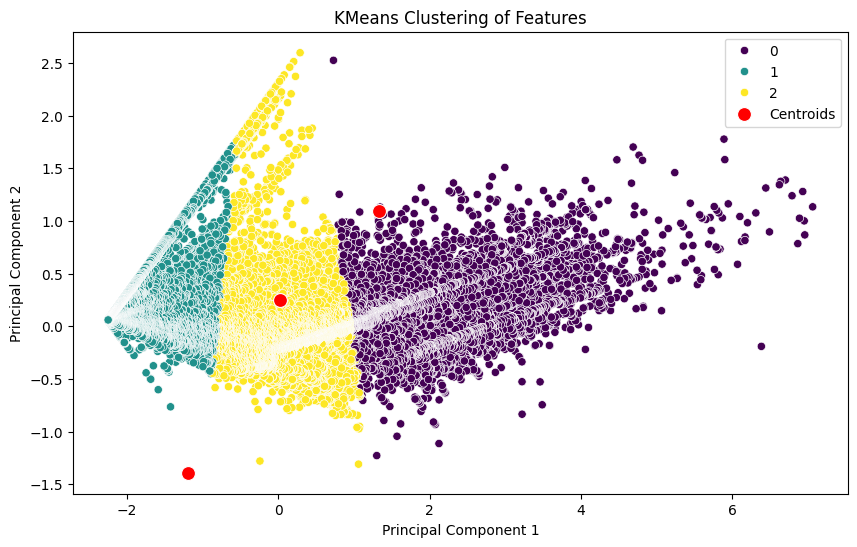

In [49]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

features = clean_df[["BasePay", "Benefits"]]
features = features.apply(pd.to_numeric, errors="coerce").dropna()

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

pca = PCA(n_components=2)
reduced_features = pca.fit_transform(scaled_features)

plt.clf()
plt.figure(figsize=(10, 6))
plt.title("KMeans Clustering of Features")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
sns.scatterplot(x=reduced_features[:, 0], y=reduced_features[:, 1], hue=clusters, palette="viridis")
sns.scatterplot(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], color="red", s=100, label="Centroids")

### Task 6
Draw conclusions on the obtained clusters. Analyze the values predicted by your best Linear Regression model and resultant clusters.

1. **Clusters Highlight Patterns**:
    - The clusters suggest that employees can be segmented into groups with distinct pay structures.
    - Employees with higher BasePay tend to receive proportionally higher benefits, validating the regression’s findings of a strong positive correlation.

2. **Model Performance Across Clusters**:
    - The regression model appears robust across most clusters, as the linear trends remain valid.
    - Any deviations between regression predictions and actual values in specific clusters could highlight outlier behaviors or unique pay structures.

3. **Business Implications**:
    - The findings enable targeted policy decisions for specific groups of employees.
    - For instance, benefits adjustments might be better tailored based on the distinct characteristics of each cluster.

### Colaboration
- *Beatricia Golban* FAF-213
- Insights on the dataset from *Cristina Tarna* FAF-211: pointed out some of the pay columns have negative values.